In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt 
import operator
%matplotlib notebook

In [2]:
kz = nx.Graph()

In [3]:
kz.add_node('Astana', pos=(71.449074, 51.169392))
kz.add_node('kokshetau', pos=(69.372482, 53.271400))
kz.add_node('karaganda', pos=(73.115601, 49.838322))
kz.add_node('pavlodar', pos=(77.034126, 52.241692))
kz.add_node('semey', pos=(80.250809, 50.423347))
kz.add_node('kostanay', pos=(63.618408, 53.208778))
kz.add_node('almaty', pos=(76.889709, 43.238949))
kz.add_node('zhezkazgan', pos=(67.82297847366239, 47.83692185330098))
kz.add_node('taldykorgan', pos=(78.40633132836422, 45.010776170047606))
kz.add_node('oskemen', pos=(82.61576192836462, 49.99118357327856))
kz.add_node('taraz', pos=(71.37812821640678, 42.91497260952511))
kz.add_node('oskemen', pos=(82.61576192836462, 49.99118357327856))
kz.add_node('shymkent', pos=(69.59666938567295, 42.3532174143199))
kz.add_node('kyzylorda', pos=(65.53045401251279, 44.86335566068077))
kz.add_node('aktobe', pos=(57.21256525562992, 50.24916215401666))
kz.add_node('Uralsk', pos=(51.40946681725677, 51.24168326344851))
kz.add_node('atyrau', pos=(51.95483176231044, 47.10687164978994))
kz.add_node('aktau', pos=(51.256153290895384, 43.64697939683984))
kz.add_node('petropavlovsk', pos=(69.17177582386908, 54.886118554221795))

#inclusion of edges:
kz.add_edge('Astana', 'kokshetau')
kz.add_edge('Astana', 'karaganda')
kz.add_edge('Astana', 'pavlodar')
kz.add_edge('Astana', 'semey')
kz.add_edge('Astana', 'kostanay')
kz.add_edge('karaganda', 'almaty')
kz.add_edge('karaganda', 'zhezkazgan')
kz.add_edge('karaganda', 'pavlodar')
kz.add_edge('karaganda', 'taldykorgan')
kz.add_edge('karaganda', 'oskemen')
kz.add_edge('almaty', 'taldykorgan')
kz.add_edge('almaty', 'taraz')
kz.add_edge('shymkent', 'taraz')
kz.add_edge('shymkent', 'kyzylorda')
kz.add_edge('kyzylorda', 'zhezkazgan')
kz.add_edge('kyzylorda', 'aktobe')
kz.add_edge('aktobe', 'kostanay')
kz.add_edge('aktobe', 'Uralsk')
kz.add_edge('aktobe', 'atyrau')
kz.add_edge('atyrau', 'Uralsk')
kz.add_edge('atyrau', 'aktau')
kz.add_edge('kostanay', 'petropavlovsk')
kz.add_edge('kostanay', 'kokshetau')
kz.add_edge('petropavlovsk', 'kokshetau')
kz.add_edge('pavlodar', 'semey')
kz.add_edge('semey', 'oskemen')
kz.add_edge('semey', 'taldykorgan')

<IPython.core.display.Javascript object>


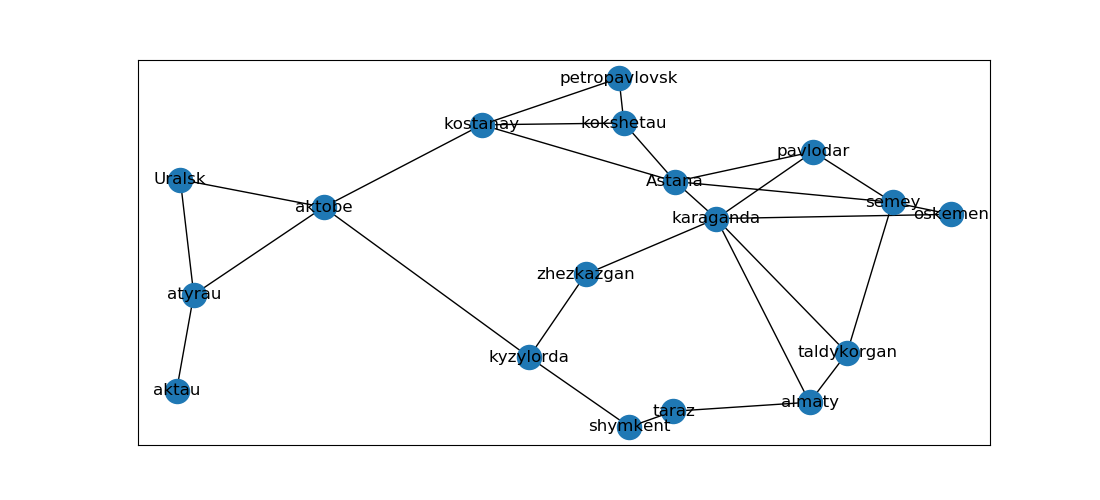

In [4]:
plt.figure(figsize=(11,5))
nx.draw_networkx(kz, nx.get_node_attributes(kz, 'pos'), with_labels=True)

In [6]:
"""While degree centrality can be used to show the importance of a node, it only concerns its 
immediate neighbours and does not consider the nodes in the network that are indirectly connected to it

Betweenness centrality overcomes this limitation of the degree centrality measure. 
It is a measure of the extent to which a node lies on 
paths between other nodes in a network (Newman, 2010). """
degr = kz.degree()

In [7]:
df1 = pd.DataFrame(degr, columns=['City', 'Degree Centrality'])
#following lines sort the table based on Degree Centrality values
df1.sort_values('Degree Centrality', ascending=False).reset_index(drop=True)

,City,Degree Centrality
0,karaganda,6
1,Astana,5
2,semey,4
3,kostanay,4
4,aktobe,4
5,kyzylorda,3
6,pavlodar,3
7,almaty,3
8,atyrau,3
9,taldykorgan,3


In [12]:
"""Closeness can be regarded as a measure of how long it will take to
spread information from v to all other nodes sequentially"""
close = nx.closeness_centrality(kz)
isinstance(close, dict) # create a new node characteristic nx.set_node_attributes(kz, close, "closeness")
nx.set_node_attributes(kz, close, "closeness")

<IPython.core.display.Javascript object>


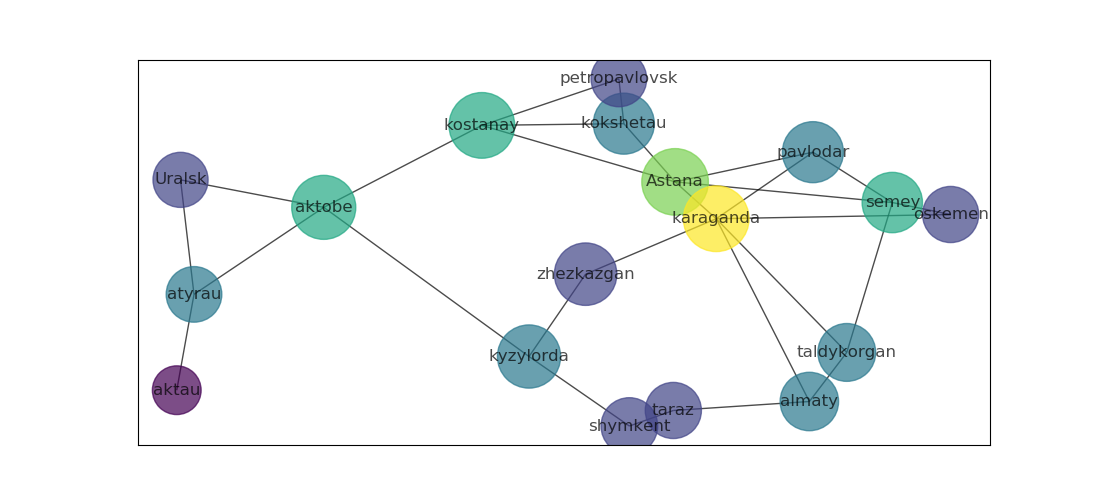

In [13]:
node_size1 = [5000*nx.get_node_attributes(kz, 'closeness')[v] for v in kz]
plt.figure(figsize=(11,5))
pos = nx.get_node_attributes(kz, 'pos')
node_color = [kz.degree(v) for v in kz]
nx.draw_networkx(kz, pos, alpha=0.7, node_size=node_size1, node_color=node_color, with_labels=True)

In [14]:
#since closeness centrality calculation returns dict, .items() is added
df2 = pd.DataFrame(close.items(), columns=['City', 'Closeness Centrality'])
df2.sort_values('Closeness Centrality', ascending=False).reset_index(drop=True)

,City,Closeness Centrality
0,Astana,0.459459
1,karaganda,0.447368
2,kostanay,0.447368
3,aktobe,0.425000
4,kyzylorda,0.414634
5,zhezkazgan,0.404762
6,pavlodar,0.386364
7,kokshetau,0.386364
8,semey,0.377778
9,almaty,0.354167


In [15]:
"""For finding the individuals who influence the flow around a system."""
"""https://www.ejilt.org/archive/view_article?pid=jilt-17-4-113"""
""" local bridge: an edge
which increased the shortest paths if cut."""
"""High betweenness centrality nodes/edges are those that will be frequently used by the entities transported through the 
network and thus they play a key role in the overall transport properties of the network."""
btwCent = nx.betweenness_centrality(kz, normalized=True, endpoints=True)
isinstance(btwCent, dict)
nx.set_node_attributes(kz, btwCent, "betweenness")

<IPython.core.display.Javascript object>


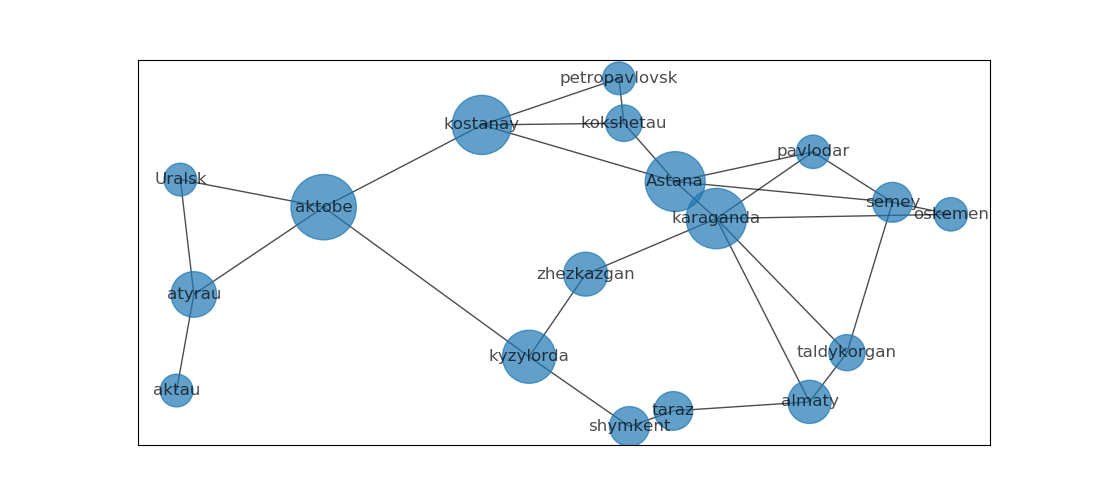

In [16]:
node_size = [5000*nx.get_node_attributes(kz, 'betweenness')[v] for v in kz]
plt.figure(figsize=(11,5))
pos = nx.get_node_attributes(kz, 'pos')

nx.draw_networkx(kz, pos, alpha=0.7, node_size=node_size, with_labels=True)

In [17]:
df3 = pd.DataFrame(btwCent.items(), columns=['City', 'Betweenness Centrality'])
df3.sort_values('Betweenness Centrality', ascending=False).reset_index(drop=True)

,City,Betweenness Centrality
0,aktobe,0.442484
1,karaganda,0.377778
2,Astana,0.371895
3,kostanay,0.362963
4,kyzylorda,0.291939
5,atyrau,0.215686
6,zhezkazgan,0.200218
7,almaty,0.192810
8,shymkent,0.164488
9,semey,0.164488
